# xRHEED example

- Open example RHEED image recorder for Si(111)-(7x7).
- Prepare Si-(1x1) lattice.
- Plot the (1x1) diffraction spots using Ewald module
- Fine adjust the image scale
- Test other functions



In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np

<Axes: xlabel='x [A]', ylabel='y [A]'>

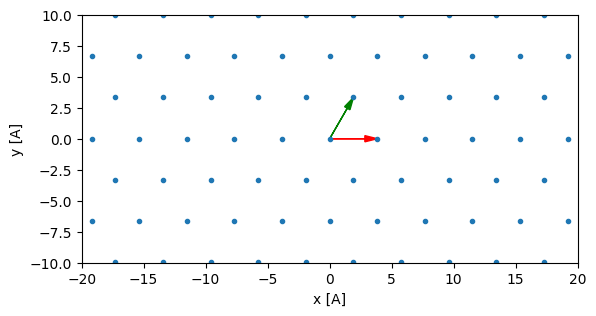

In [6]:
from xrheed.ewald.lattice import Lattice

si_111 = Lattice.from_bulk_cubic(a=5.43, cubic_type="FCC", plane='111')
si_111.rotate(phi=10)
si_111.rotate(phi=-10)
si_111.plot_real()

umcs_arpes_raw
example_data/si_111_7x7_112_t2.raw


1.0

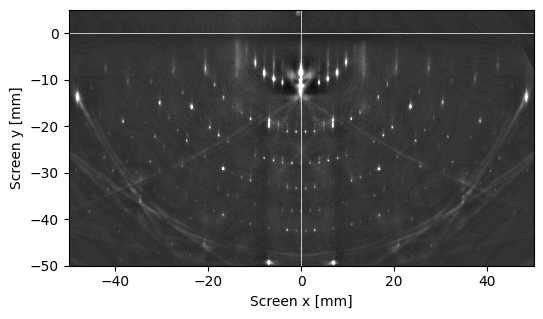

In [5]:
import xrheed
from xrheed.io import load_data
import matplotlib.pyplot as plt
import numpy as np

r = load_data("example_data/si_111_7x7_112_t2.raw", plugin="umcs_arpes_raw")
r.R.set_center()
r.R.hp_sigma = 20
r.R.hp_threshold = 0.9

r.R.plot_image(hp_filter=True, vmin=0, vmax=50)
r.R.theta

umcs_arpes_raw
example_data/si_111_7x7_112_t2.raw
d:\workspace\pyrheed\docs\notebooks\example_data\si_111_7x7_112_t2.raw is a file.


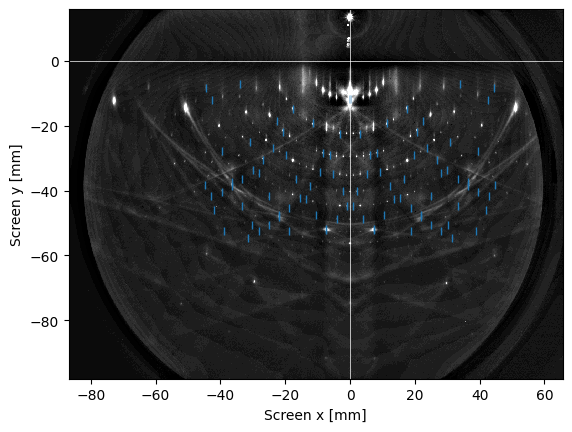

In [146]:
from pyrheed.io import load_data
from pyrheed.ewald import Ewald
from pyrheed.ewald.lattice import Lattice
import matplotlib.pyplot as plt
import numpy as np

r = load_data("example_data/si_111_7x7_112_t2.raw", plugin="umcs_arpes_raw")
r.R.set_center()
r.R.hp_sigma = 30
r.R.hp_threshold = 0.9

r.R.screen_scale = 9.1
r.R.theta = 2.2

si_111 = Lattice.from_surface(a=3.84*2.67, plane='111')
e1 = Ewald(si_111, r)
e1.phi = 11
e1.lattice_scale = 1.0
e1.screen_size_w = 45
e1.screen_size_h = 55
e1.calculate_ewald()

fig, ax = plt.subplots() 
e1.plot(ax=ax)
r.R.plot_image(ax=ax, hp_filter=True,vmin=5, vmax=30)
plt.show()

umcs_arpes_raw
example_data/si_111_7x7_112_t2.raw
d:\workspace\pyrheed\docs\notebooks\example_data\si_111_7x7_112_t2.raw is a file.


  0%|          | 0/100 [00:00<?, ?it/s]

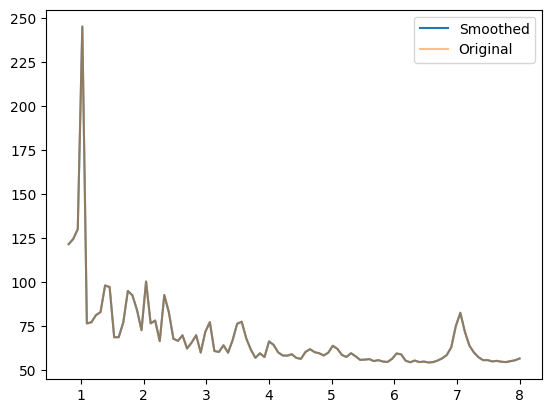

In [112]:
from pyrheed.io import load_data
from pyrheed.ewald import Ewald
from pyrheed.ewald.lattice import Lattice
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

r = load_data("example_data/si_111_7x7_112_t2.raw", plugin="umcs_arpes_raw")
r.R.set_center()
r.R.hp_sigma = 20
r.R.hp_threshold = 0.9
r.R.screen_scale = 9.1
r.R.theta = 2.2

si_111 = Lattice.from_surface(a=3.84, plane='111')
e1 = Ewald(si_111, r)
e1.phi = 30
e1.lattice_scale = 1.0
e1.screen_size_w = 55
e1.screen_size_h = 55

e1._spot_structure =   np.array([
                            [False, True, False],
                            [True, True, True],
                            [False, True, False]]
                            , dtype=bool)

scale_vector_1 = np.linspace(0.8, 8, 200)

match_vector_1 = e1.match_scale(scale_vector_1)

plt.plot(scale_vector_1, match_vector_1)
plt.show()

umcs_arpes_raw
example_data/si_111_7x7_112_t2.raw
d:\workspace\pyrheed\docs\notebooks\example_data\si_111_7x7_112_t2.raw is a file.


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

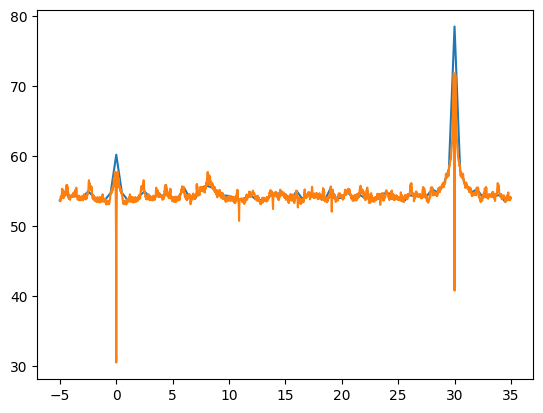

In [113]:
import pyrheed
from pyrheed.io import load_data
import matplotlib.pyplot as plt
import numpy as np
from pyrheed.ewald import Ewald
from pyrheed.ewald.lattice import Lattice

r = load_data("example_data/si_111_7x7_112_t2.raw", plugin="umcs_arpes_raw")
r.R.set_center()
r.R.hp_sigma = 20
r.R.hp_threshold = 0.9

r.R.screen_scale = 9.1
r.R.theta = 2.2

si_111 = Lattice.from_surface(a=3.84*7, plane='111')
e1 = Ewald(si_111, r)

e1.screen_size_w = 55
e1.screen_size_h = 55
e1.phi = 30

phi_vector = np.arange(-5, 35, 0.5)
phi_vector_2 = np.arange(-5, 35, 0.01)

match_vector = e1.match_phi(phi_vector=phi_vector)
match_vector_2 = e1.match_phi(phi_vector=phi_vector_2)
plt.plot(phi_vector, match_vector)
plt.plot(phi_vector_2, match_vector_2)
plt.show()


In [86]:
import pyrheed
from pyrheed.io import load_data
import matplotlib.pyplot as plt
import numpy as np
from pyrheed.ewald import Ewald
from pyrheed.ewald.lattice import Lattice

r = load_data("example_data/si_111_7x7_112_t2.raw", plugin="umcs_arpes_raw")
r.R.set_center()
r.R.hp_sigma = 20
r.R.hp_threshold = 0.9

r.R.screen_scale = 9.1
r.R.theta = 2.2

si_111 = Lattice.from_surface(a=3.84, plane='111')
e1 = Ewald(si_111, r)

e1.screen_size_w = 55
e1.screen_size_h = 55
e1.phi = 30

phi_vector = np.arange(-5, 35, 0.5)
scale_vector = np.linspace(0.8, 8, 200)

match_matrix = e1.match_phi_scale(phi_vector=phi_vector, scale_vector=scale_vector)
#plt.imshow(match_matrix)

umcs_arpes_raw
example_data/si_111_7x7_112_t2.raw
d:\workspace\pyrheed\docs\notebooks\example_data\si_111_7x7_112_t2.raw is a file.


Matching scales:   0%|          | 0/200 [00:00<?, ?it/s]

In [97]:
from scipy import ndimage

match_norm = match_matrix.copy()
match_norm -= 0.9*ndimage.gaussian_filter(match_norm, sigma=20)

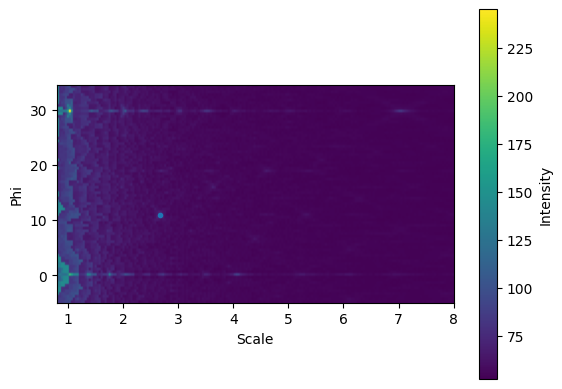

In [148]:
%matplotlib inline


extent = (scale_vector[0], scale_vector[-1], phi_vector[0], phi_vector[-1])

fig, ax = plt.subplots()
cax = ax.imshow(match_matrix, extent=extent, origin="lower", aspect=0.1)
fig.colorbar(cax, label="Intensity")

ax.set_xlabel('Scale')
ax.set_ylabel('Phi')
ax.plot(2.67, 11, '.')

# Show interactive plot
plt.show()

483.92500000000007


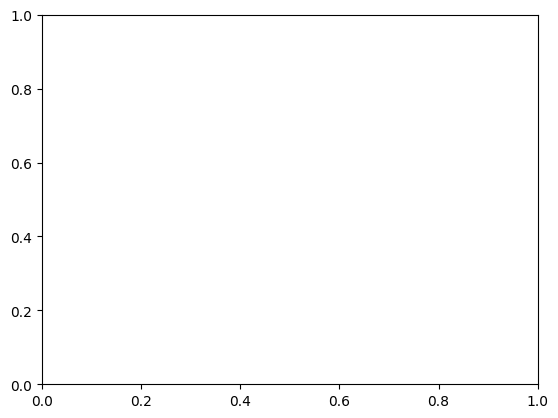

In [9]:
from pyrheed.ewald import Ewald
from pyrheed.ewald.lattice import Lattice


si_111 = Lattice.from_bulk(a=5.43, plane='111')
#print(si_111)
e1 = Ewald(si_111, r)


#r.R.screen_scale = 9.1
e1.calculate_ewald(phi=90, theta=2.2)


fig, ax = plt.subplots() 

print(e1.calculate_match())




In [10]:
print(e1.pz[0])
r.y.min()

print(-(e1.pz - r.y.values.max())* r.R.screen_scale)
print(-(e1.px - r.x.values.max())* r.R.screen_scale)

-41.10450129913569
[519.05096182 606.40119397 668.16840335 712.76445066 744.03667777
 764.00774462 773.75544625 221.70892559 773.75544625 253.09221919
 764.00774462 221.70892559 744.03667777 712.76445066 668.16840335
 606.40119397 519.05096182]
[1103.89214046 1025.90873424  947.92532801  869.94192179  791.95851556
  713.97510934  635.99170311  673.15555517  558.00829689  597.
  480.02489066  520.84444483  402.04148444  324.05807821  246.07467199
  168.09126576   90.10785954]
